## Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
path = r'C:\Users\sstorer\OneDrive\ML Specialization'

In [6]:
climate = pd.read_csv(os.path.join(path, 'Data Sets', 'weather_cleaned.csv'))

In [8]:
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
climate['DATE'] = pleasantweather['DATE']

## Data Wrangling

In [13]:
# Reduce observations dataset to 2010's to reduce model runtime

climate2010s = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate2010s

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,1.0054,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0,20100101
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,8.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0250,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2,20100102
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.0156,0.25,0.12,0.0,

In [15]:
# Reduce pleasantweather dataset to 2010's

pleasant2010s = pleasantweather[(pleasantweather['DATE'].astype(str).str[:4] >= '2010') & (pleasantweather['DATE'].astype(str).str[:4] <= '2019')]
pleasant2010s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Drop unnecessary columns

climate2010s.drop(['DATE'], axis=1, inplace=True)

In [19]:
climate2010s.shape

(3652, 135)

In [21]:
pleasant2010s.drop(['DATE'], axis=1, inplace=True)

In [23]:
pleasant2010s.shape

(3652, 15)

In [25]:
X = climate2010s

In [27]:
y = pleasant2010s

In [29]:
# Turn X and y from dataframes to arrays

X = np.array(X)
y = np.array(y)

## Splitting Data into Testing and Training Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Hyperparameter Optimization

### Grid Search

In [36]:
# Create a RF classifier

clf = RandomForestClassifier()

In [38]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [40]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 30.00253670612971 minutes


In [42]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6425702811244979


## Random Forest Model with Optimized Hyperparameters

In [45]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [47]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6659364731653888


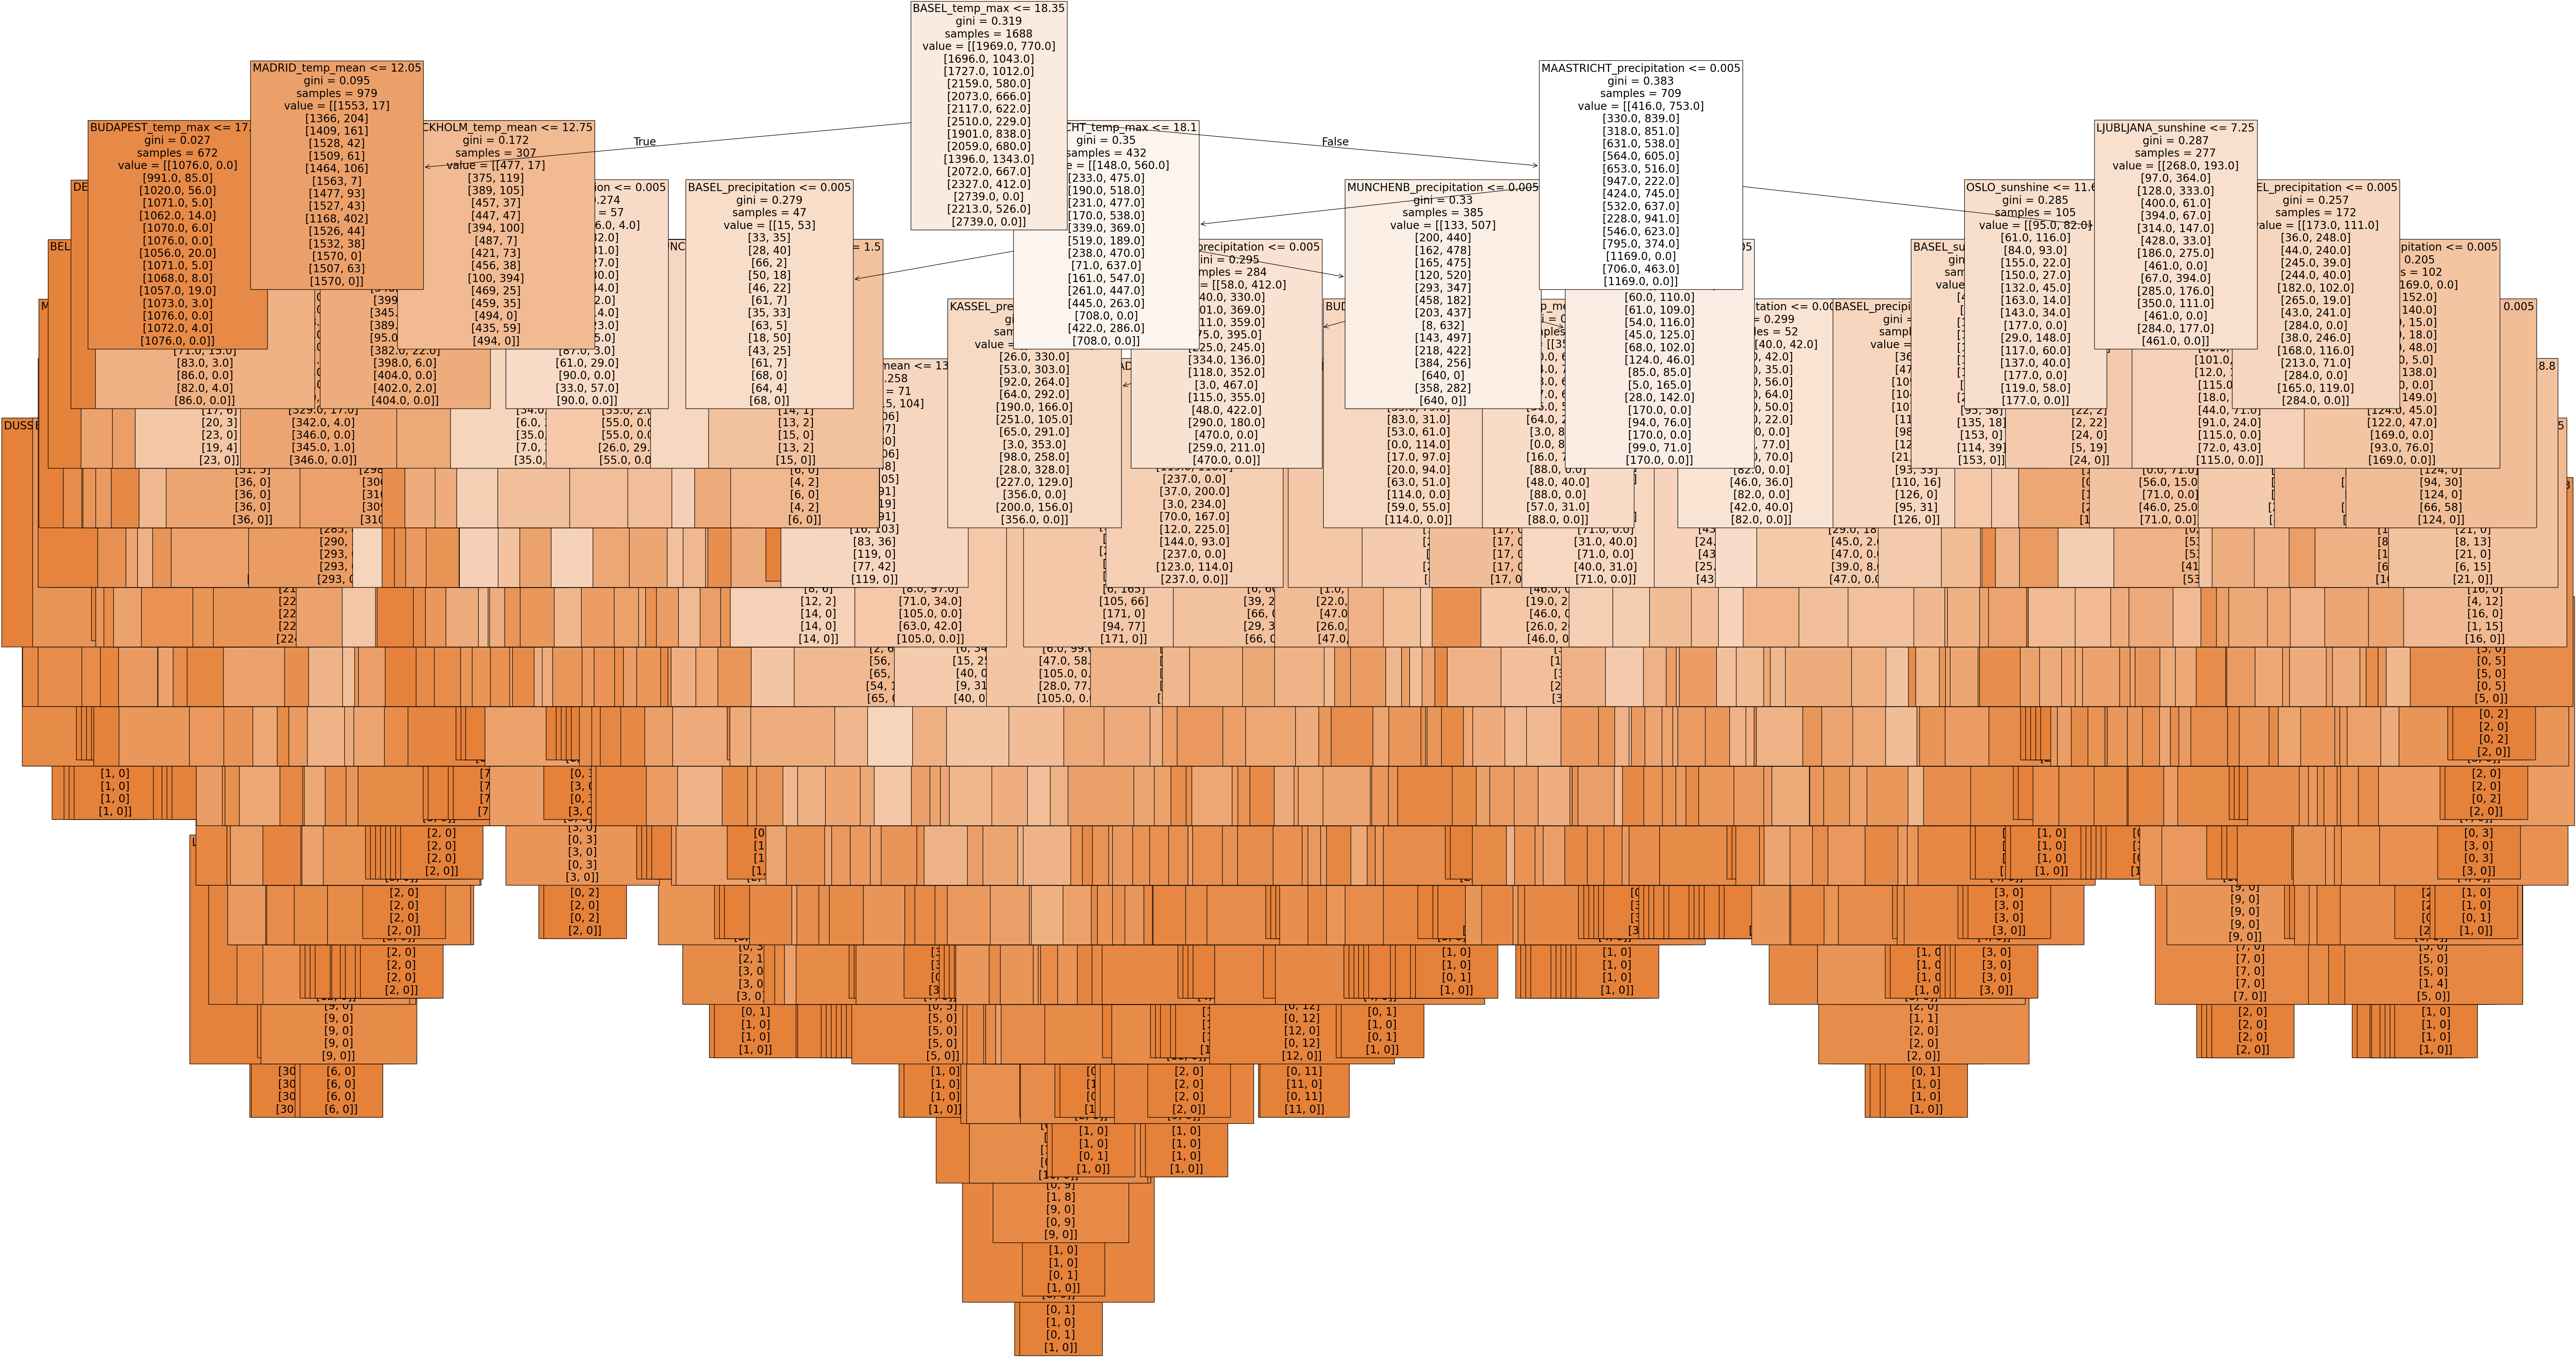

In [51]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = climate2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [53]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.68491383e-03, 2.71240862e-03, 2.20515949e-03, 2.29086901e-03,
       2.88482668e-02, 4.80516087e-03, 1.43103025e-02, 1.95190206e-03,
       7.63430264e-02, 2.84887929e-03, 2.35592887e-03, 2.50189410e-03,
       2.10246400e-03, 2.67045882e-02, 2.17322245e-03, 3.92177890e-03,
       2.00725010e-03, 8.57867897e-03, 2.61681446e-04, 0.00000000e+00,
       0.00000000e+00, 9.02381589e-04, 2.51372248e-02, 8.97268088e-04,
       7.23016469e-03, 1.99734906e-03, 1.77861561e-02, 1.47908481e-03,
       2.00234165e-03, 2.37373157e-03, 2.39921432e-03, 1.88442202e-02,
       2.73510849e-03, 2.38101826e-03, 1.96390147e-03, 4.56699622e-02,
       1.37208337e-03, 1.97900369e-03, 2.20765009e-03, 2.12647010e-03,
       3.55741158e-02, 3.01392446e-03, 8.39040046e-03, 1.97855555e-03,
       1.04794255e-01, 1.90256498e-03, 3.28961151e-03, 2.59404261e-03,
       3.21206037e-03, 1.34904841e-02, 3.61562798e-03, 2.94744097e-03,
       2.18506846e-03, 9.31346470e-03, 2.02111233e-03, 1.69989920e-03,
      

In [55]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.68491383e-03, 2.71240862e-03, 2.20515949e-03, 2.29086901e-03,
         2.88482668e-02, 4.80516087e-03, 1.43103025e-02, 1.95190206e-03,
         7.63430264e-02],
        [2.84887929e-03, 2.35592887e-03, 2.50189410e-03, 2.10246400e-03,
         2.67045882e-02, 2.17322245e-03, 3.92177890e-03, 2.00725010e-03,
         8.57867897e-03],
        [2.61681446e-04, 0.00000000e+00, 0.00000000e+00, 9.02381589e-04,
         2.51372248e-02, 8.97268088e-04, 7.23016469e-03, 1.99734906e-03,
         1.77861561e-02],
        [1.47908481e-03, 2.00234165e-03, 2.37373157e-03, 2.39921432e-03,
         1.88442202e-02, 2.73510849e-03, 2.38101826e-03, 1.96390147e-03,
         4.56699622e-02],
        [1.37208337e-03, 1.97900369e-03, 2.20765009e-03, 2.12647010e-03,
         3.55741158e-02, 3.01392446e-03, 8.39040046e-03, 1.97855555e-03,
         1.04794255e-01],
        [1.90256498e-03, 3.28961151e-03, 2.59404261e-03, 3.21206037e-03,
         1.34904841e-02, 3.61562798e-03, 2.94744097e-03, 2.18506846

In [57]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13515201, 0.05319468, 0.05421223, 0.07984858, 0.16143646,
       0.04255037, 0.02695741, 0.07524048, 0.12162138, 0.07612232,
       0.07216364, 0.04353964, 0.01776954, 0.03730336, 0.00288791])

In [59]:
# Extract stations list

stations = [col.split('_')[0] for col in climate2010s.columns if '_' in col]

In [61]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [63]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [65]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BUDAPEST      0.161436
MUNCHENB      0.135152
STOCKHOLM     0.121621
DEBILT        0.079849
MADRID        0.076122
MAASTRICHT    0.075240
HEATHROW      0.072164
VALENTIA      0.054212
BASEL         0.053195
OSLO          0.043540
LJUBLJANA     0.042550
SONNBLICK     0.037303
KASSEL        0.026957
DUSSELDORF    0.017770
BELGRADE      0.002888
dtype: float64

In [67]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MUNCHENB', 'BASEL', 'VALENTIA', 'DEBILT', 'BUDAPEST', 'LJUBLJANA', 'KASSEL', 'MAASTRICHT', 'STOCKHOLM', 'MADRID', 'HEATHROW', 'OSLO', 'DUSSELDORF', 'SONNBLICK', 'BELGRADE']


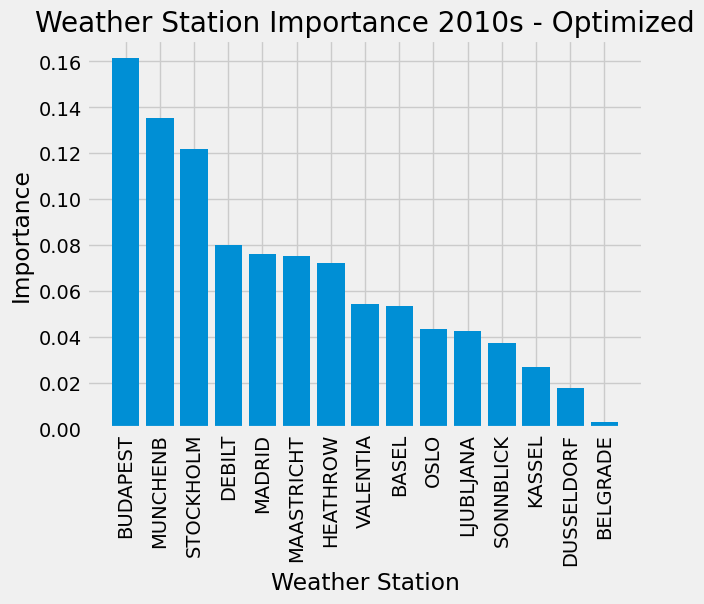

In [69]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.show()

## Data Wrangling (MUNCHENB)

In [72]:
# Create a list of the columns containing "Munchenb" in their names

munchenb_list = [col for col in climate.columns if 'MUNCHENB' in col]
munchenb_list

['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']

In [74]:
# Create a dataframe with those columns

df_munchenb = climate[munchenb_list]
df_munchenb

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max
0,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4
1,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2
2,6,0.91,1.0320,0.20,0.30,0.0,5.8,4.0,8.0
3,6,0.90,1.0443,0.20,0.01,0.0,3.9,3.2,5.4
4,5,0.85,1.0430,0.65,0.96,5.6,1.8,-3.0,6.0
...,...,...,...,...,...,...,...,...,...
22945,2,0.76,1.0263,1.37,0.26,9.7,14.3,8.3,22.2
22946,6,0.70,1.0263,1.37,0.26,7.7,16.1,8.9,26.1
22947,7,0.64,1.0263,1.37,0.26,6.8,17.4,11.2,26.2
22948,6,0.75,1.0263,1.37,0.26,8.3,14.5,9.2,23.5


In [76]:
# Reduce answers dataset to Munchenb's answers only

pleasant_munchenb = pleasantweather['MUNCHENB_pleasant_weather']
pleasant_munchenb

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MUNCHENB_pleasant_weather, Length: 22950, dtype: int64

In [78]:
X2 = df_munchenb

In [80]:
y2 = pleasant_munchenb

In [82]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [84]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

## Hyperparameter Optimization

### Random Search

In [88]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [90]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [92]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.1419222990671796 minutes


In [94]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': np.int64(50), 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': np.int64(4), 'n_estimators': np.int64(60)}
Best RANDOM search score is: 1.0


## Optimized Random Forest (Munchenb)

In [97]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = np.int64(60), max_depth= np.int64(50), max_features=6, min_samples_leaf=2, min_samples_split=np.int64(4), criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(50), max_features=6,
                       min_samples_leaf=2, min_samples_split=np.int64(4),
                       n_estimators=np.int64(60))

In [99]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


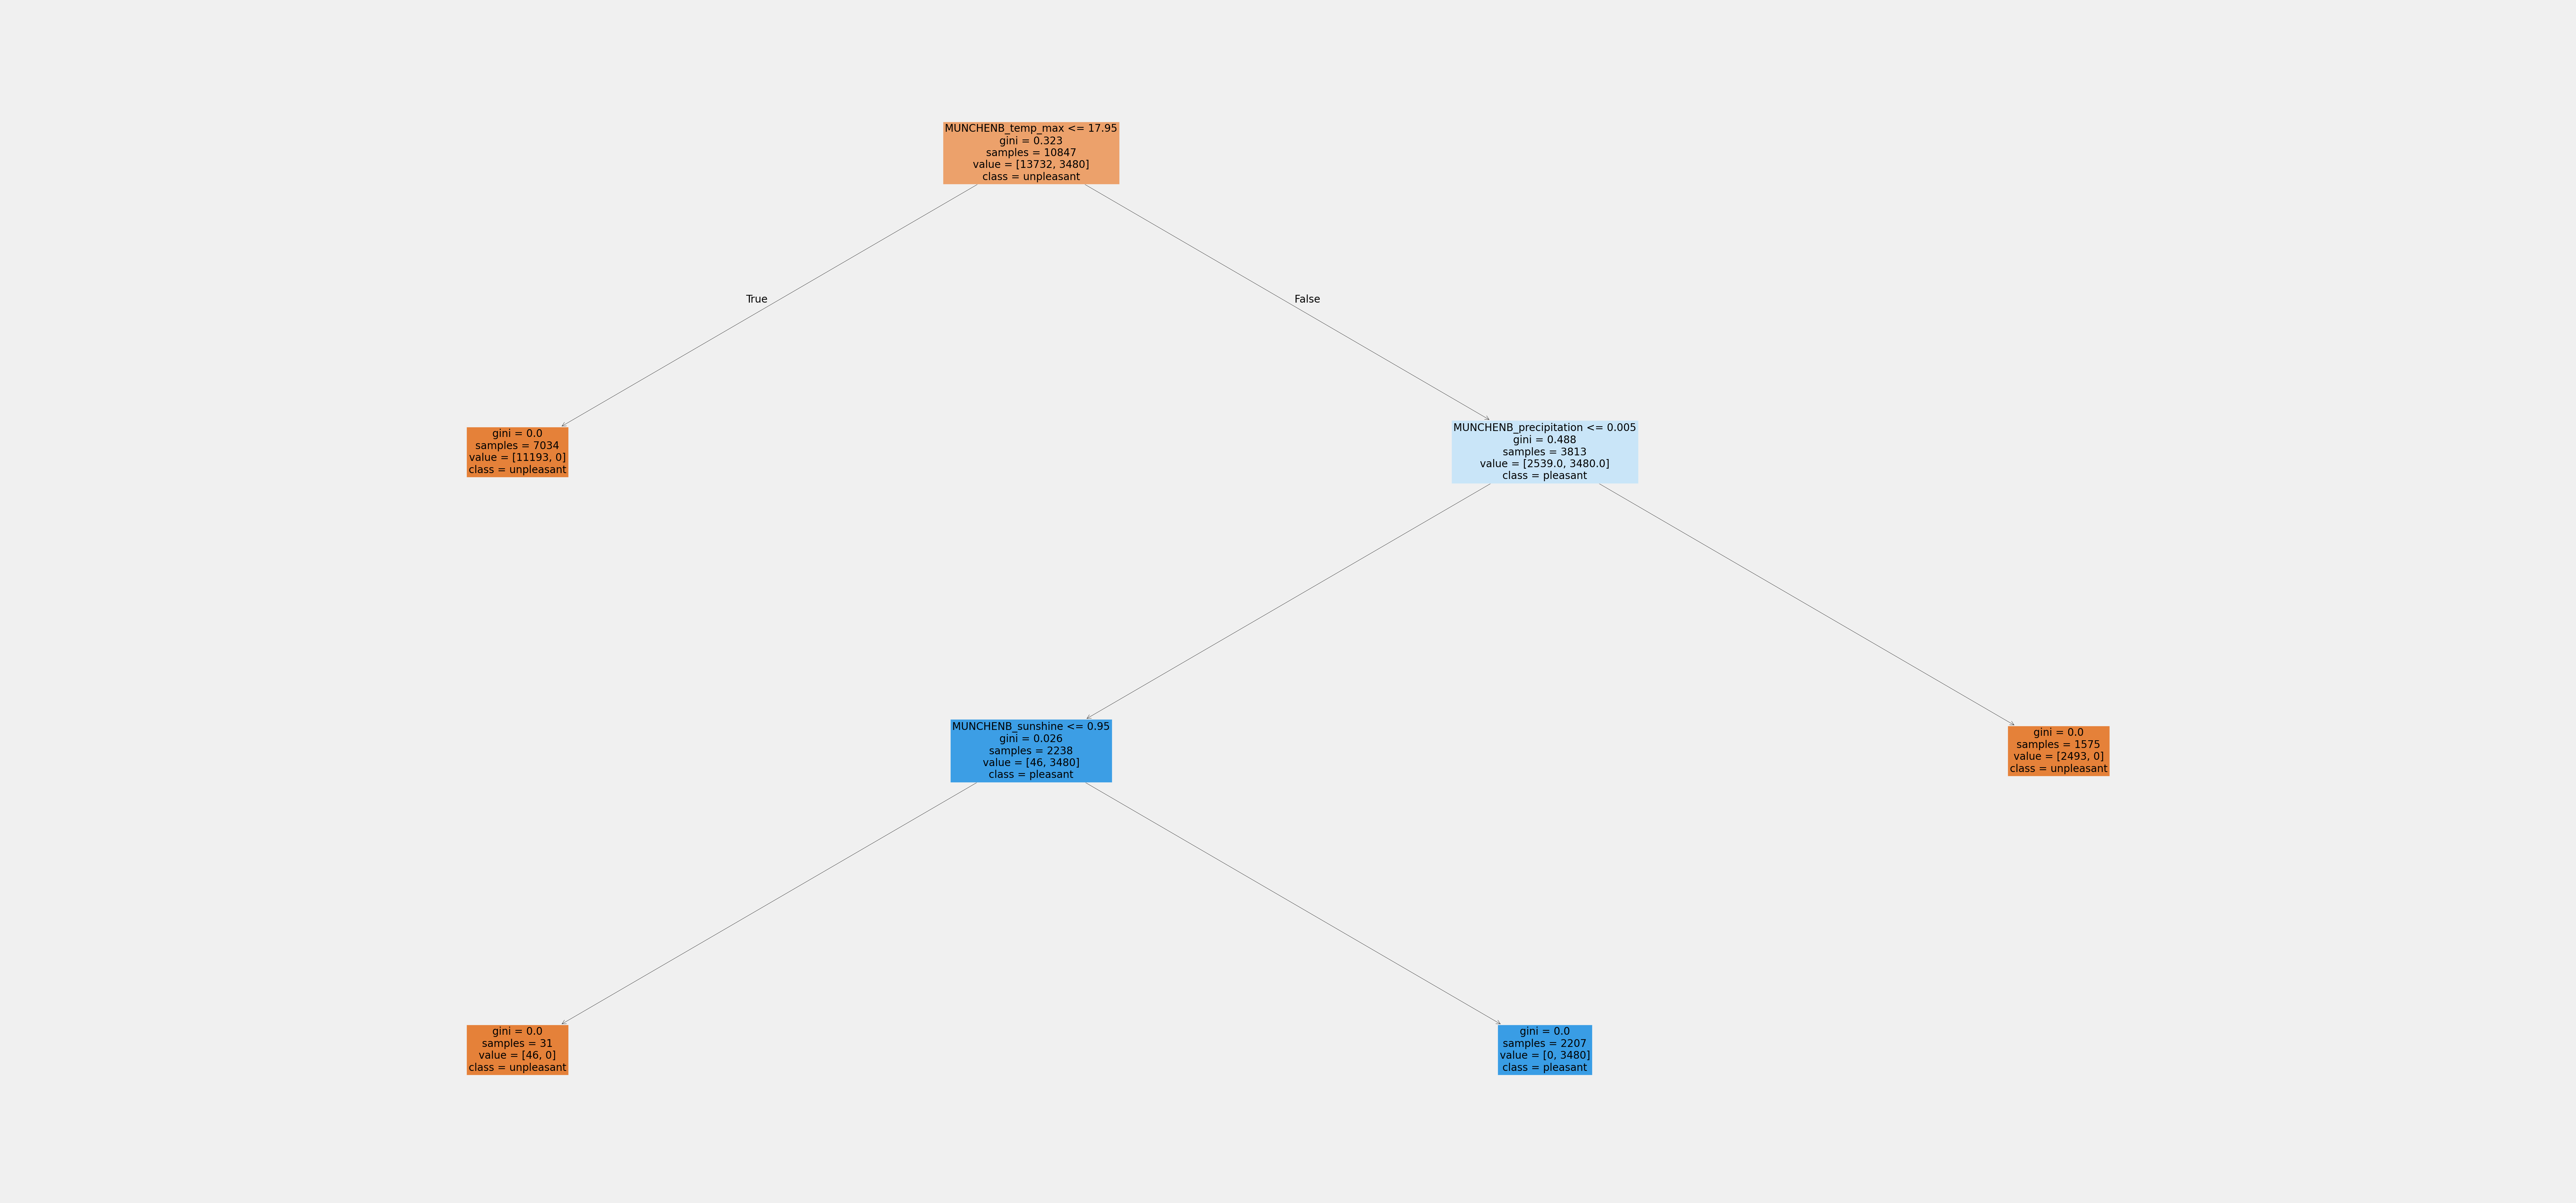

In [101]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_munchenb.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [103]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([3.04312767e-02, 5.94814896e-04, 2.03487280e-03, 7.06326706e-03,
       4.56263969e-01, 6.55897424e-02, 9.17714534e-02, 1.15932426e-04,
       3.46134672e-01])

In [105]:
# Create a list of weather features

wx_list = [feature.replace('MUNCHENB_', '') for feature in munchenb_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [107]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.030431
humidity            0.000595
pressure            0.002035
global_radiation    0.007063
precipitation       0.456264
sunshine            0.065590
temp_mean           0.091771
temp_min            0.000116
temp_max            0.346135
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


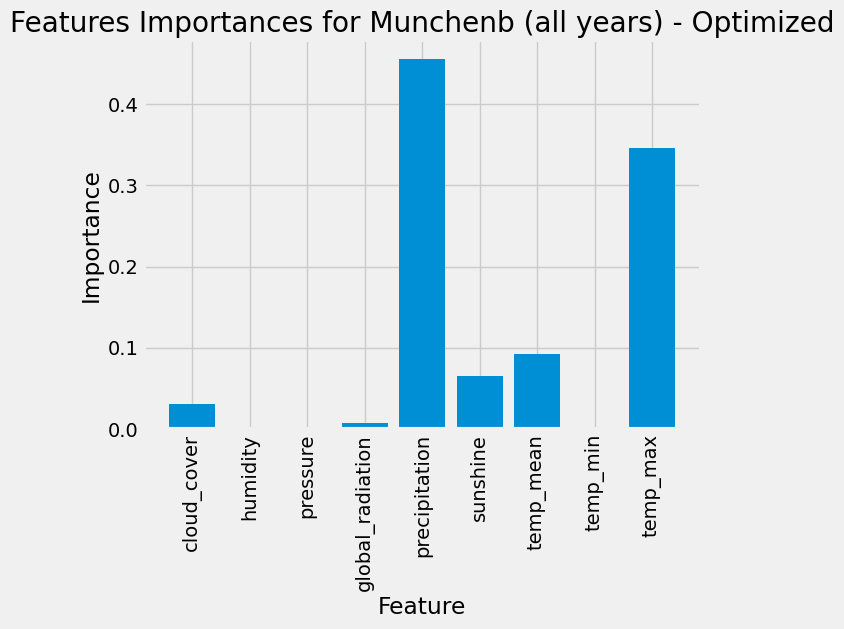

In [109]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Munchenb (all years) - Optimized');

plt.show()